In [238]:
import json
import pandas as pd
import requests

In [340]:
lexai_url = f"http://35.223.18.2/indexes/twitter_query/search/"
params=dict(q='',limit=20000)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}

data = requests.get(lexai_url,params=params,headers=headers).json()
data_query_df=pd.DataFrame(data['hits'])
data_query_df

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,...,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score,sentiment
0,1400733317993951232,1.622789e+09,Lya04Choi,@jeobby05 bismillah kelirik kak mel cantippp !...,@jeobby05 bismillah kelirik kak mel cantippp !...,2021/06/04 08:37:02,in,in,False,125,...,Choi Lya 04\nMy ultimate bias Jeno Hyunjin Yos...,Choi Lya 04 My ultimate bias Jeno Hyunjin Yosh...,http://pbs.twimg.com/profile_images/1397729105...,,jeobby05,0,0,https://twitter.com/Lya04Choi/status/140073331...,0.8713,positive
1,1400733318413312005,1.622789e+09,sincerelyyourzs,"RT @_opioids_: ""LeT wOmeN wEAr wHAteVer thEy w...",RT @_opioids_: &quot;LeT wOmeN wEAr wHAteVer t...,2021/06/04 08:37:02,in,in,False,257,...,Translate bio,Translate bio,http://pbs.twimg.com/profile_images/1400357767...,,_opioids_,6,0,https://twitter.com/sincerelyyourzs/status/140...,0.7912,positive
2,1400733318572691457,1.622789e+09,ecasayangoci,Plis gue bingung harus percaya atau engga. Dis...,I&#39;m confused about whether to believe it o...,2021/06/04 08:37:02,in,in,False,532,...,#YOSHINORI profesional thinker &lovers . . .😾\...,#YOSHINORI professional thinkers &amp; lovers ...,http://pbs.twimg.com/profile_images/1400450863...,,,0,0,https://twitter.com/ecasayangoci/status/140073...,0.7351,positive
3,1400733320346968068,1.622789e+09,hanjisungkuu,RT @stayspedia_id: Lee Know dan Chan ngelive b...,RT @stayspedia_id: Lee Know and Chan live toge...,2021/06/04 08:37:02,in,in,False,192,...,98' acc baca au,98 &#39;acc baca to,http://pbs.twimg.com/profile_images/1395395543...,,stayspedia_id,190,0,https://twitter.com/hanjisungkuu/status/140073...,0.2500,positive
4,1400733315963834368,1.622789e+09,lynnsakina,RT @embunkarinapoet: best gila filem ini. sing...,RT @embunkarinapoet: best gila film ini. singl...,2021/06/04 08:37:01,in,in,False,352,...,The happiest people don't have the best of eve...,The happiest people don't have the best of eve...,http://pbs.twimg.com/profile_images/1394973798...,,embunkarinapoet,4178,0,https://twitter.com/lynnsakina/status/14007333...,0.9001,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17802,1397817744624656384,1.622093e+09,OPublicaINFO,“Livrabilele” programului “România educată” ...,The “deliverables” of the “Educated Romania” p...,2021/05/27 07:31:35,ro,ro,False,128,...,Publicatie Online - Revista presei,Online Publication - Press Review,http://pbs.twimg.com/profile_images/9060877700...,,,0,0,https://twitter.com/OPublicaINFO/status/139781...,0.6739,positive
17803,1397817049209053187,1.622093e+09,EYNCNrvu3JHzK82,RT @strani_placenik: Naprednjaci upravo tiho k...,RT @strani_placenik: Napredniks are just quiet...,2021/05/27 07:28:49,und,und,False,0,...,,None,http://pbs.twimg.com/profile_images/1397813907...,,strani_placenik,33,0,https://twitter.com/EYNCNrvu3JHzK82/status/139...,0.1280,neutral
17804,1397815813164486657,1.622093e+09,TzvetVassilev,"RT @radosveta_vass: 1. @clubz_bg, Във връзка с...","RT @radosveta_vass: 1. @clubz_bg, In connectio...",2021/05/27 07:23:54,bg,bg,False,667,...,"Banking Chairman, Entrepreneur, Enemy of Bulga...","Banking Chairman, Entrepreneur, Enemy of Bulga...",http://pbs.twimg.com/profile_images/8091678486...,КТБ,"radosveta_vass, clubz_bg",5,0,https://twitter.com/TzvetVassilev/status/13978...,-0.5267,negative
17805,1397815137743028227,1.622093e+09,hen02sng,RT @_nuthatch_: Widzę że Yixing się na węd...,RT @_nuthatch_: I see Yixing has switched to f...,2021/05/27 07:21:13,pl,pl,False,1990,...,exo nct ## love zone | khh🖇️krnb,exo nct ## love zone | khh🖇️krnb,http://pbs.twimg.com/profile_images/1399123298...,,_nuthatch_,15,0,https://twitter.com/hen02sng/status/1397815137...,0.0000,neutral


In [341]:
lexai_url = f"http://35.223.18.2/indexes/twitter_press/search/"
data = requests.get(lexai_url,params=params,headers=headers).json()
data_press_df=pd.DataFrame(data['hits'])
data_press_df

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,...,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score,sentiment
0,1400776277506904073,1.622799e+09,dikaiologitika,@SteliosPetsas Σε δήμους και περιφέρειες ο Ε...,None,2021/06/04 11:27:44,el,None,False,7662,...,Γιατί η επικαιρότητα έχει πραγματικές ειδη...,None,http://pbs.twimg.com/profile_images/1387863604...,,SteliosPetsas,0,0,https://twitter.com/dikaiologitika/status/1400...,NaN,NaN
1,1400775920777113600,1.622799e+09,guardian,Why I started streaming video games on Twitch ...,None,2021/06/04 11:26:19,en,None,True,9745891,...,The need for independent journalism has never ...,None,http://pbs.twimg.com/profile_images/1175141826...,,,0,8,https://twitter.com/guardian/status/1400775920...,NaN,NaN
2,1400775866230087681,1.622799e+09,DRNyheder,LIVE: Regeringen vil præsentere sommer- og erh...,None,2021/06/04 11:26:06,da,None,True,236361,...,Her får du alle nyheder fra DR - Danmarks mes...,None,http://pbs.twimg.com/profile_images/1121383605...,,,0,0,https://twitter.com/DRNyheder/status/140077586...,NaN,NaN
3,1400775830461108227,1.622799e+09,DelfiLV,Naudas sodi ir vairāku minimālo mēnešalgu ...,None,2021/06/04 11:25:57,lv,None,True,122104,...,Populārākais ziņu portāls Latvijā.,None,http://pbs.twimg.com/profile_images/6663927794...,,,0,0,https://twitter.com/DelfiLV/status/14007758304...,NaN,NaN
4,1400775644838039556,1.622799e+09,noticiaaominuto,Putin promulga lei que afasta oposição do pr...,None,2021/06/04 11:25:13,pt,None,False,19184,...,Notícias ao Minuto - Seja o primeiro a saber.,None,http://pbs.twimg.com/profile_images/3788000002...,mundoaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,420834842037583874,1.389166e+09,btv_official,"Смяташ ли, че имаш талант? Може и да не е стра...",Do you think you have talent? It may not be as...,2014/01/08 08:30:19,bg,None,False,8078,...,bTV - повече от телевизия!,bTV - more than TV!,http://pbs.twimg.com/profile_images/2085889458...,,,0,1,https://twitter.com/btv_official/status/420834...,0.5255,positive
6143,420824938748997632,1.389164e+09,btv_official,"Социолози: Властта „оцелява” до евровота, посл...",Sociologists: The government &quot;survives&qu...,2014/01/08 07:50:58,bg,None,False,8078,...,bTV - повече от телевизия!,bTV - more than TV!,http://pbs.twimg.com/profile_images/2085889458...,,,0,1,https://twitter.com/btv_official/status/420824...,0.0000,neutral
6144,420813011549687808,1.389161e+09,btv_official,Голям успех :),Great success :),2014/01/08 07:03:34,bg,None,False,8078,...,bTV - повече от телевизия!,bTV - more than TV!,http://pbs.twimg.com/profile_images/2085889458...,,,0,1,https://twitter.com/btv_official/status/420813...,0.8957,positive
6145,420663620796956673,1.389125e+09,btv_official,@ivan_naidenov Честит имен ден!,@ivan_naidenov Happy name day!,2014/01/07 21:09:57,ru,None,False,8078,...,bTV - повече от телевизия!,bTV - more than TV!,http://pbs.twimg.com/profile_images/2085889458...,,ivan_naidenov,0,1,https://twitter.com/btv_official/status/420663...,0.6114,positive


In [342]:
lexai_url = f"http://35.223.18.2/indexes/twitter_politicians/search/"
data = requests.get(lexai_url,params=params,headers=headers).json()
data_polit_df=pd.DataFrame(data['hits'])
data_polit_df

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,...,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score,sentiment
0,1400763714316521474,1.622796e+09,FZarzalejos,La #UniónEuropea🇪🇺 ha estado donde necesitáb...,The #European Union🇪🇺 has been where we needed...,2021/06/04 10:37:49,es,None,False,1127,...,Diputado (@EPPGroup) en @EuropeanParliament. M...,Deputy (@EPPGroup) in @EuropeanParliament. Mem...,http://pbs.twimg.com/profile_images/1151083649...,"UniónEuropea, Marruecos, Gobierno",,0,0,https://twitter.com/FZarzalejos/status/1400763...,-0.0516,neutral
1,1400761590203494402,1.622795e+09,woelken,Ich werde mehr Transparenz auf Werbemärkten f...,I will demand more transparency in advertising...,2021/06/04 10:29:22,de,None,True,58557,...,"Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,,,1,13,https://twitter.com/woelken/status/14007615902...,-0.2732,negative
2,1400761591340191746,1.622795e+09,woelken,Mehr Infos zum Wettbewerbsverfahren hier:,More information about the competition procedu...,2021/06/04 10:29:22,de,None,True,58557,...,"Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,,,0,9,https://twitter.com/woelken/status/14007615913...,0.0000,neutral
3,1400761588538294273,1.622795e+09,woelken,Die Kommission hat ein #Wettbewerbsverfahren g...,The Commission has launched a #competition aga...,2021/06/04 10:29:22,de,None,True,58557,...,"Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,"Wettbewerbsverfahren, Facebook, DigitalMarkets...",,2,17,https://twitter.com/woelken/status/14007615885...,0.0708,neutral
4,1400761514827583489,1.622795e+09,IdoiaVR,RT @PODEMOS: !!️ Ya están disponibles las ent...,RT @PODEMOS: !! ️ Tickets are now available to...,2021/06/04 10:29:04,es,None,True,10278,...,Eurodiputada #Navarra por Unidas Podemos en @L...,MEP #Navarra for United We Can at @Left_EU Res...,http://pbs.twimg.com/profile_images/9467362766...,,PODEMOS,41,0,https://twitter.com/IdoiaVR/status/14007615148...,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1369005762790514697,1.615228e+09,joao_ferreira33,RT @duartealves_: A eurest teve lucros de 100 ...,RT @duartealves_: Eurest had profits of 100 mi...,2021/03/08 19:23:03,pt,None,True,9127,...,Deputado do PCP no Parlamento Europeu. Vereado...,PCP Member of the European Parliament. Council...,http://pbs.twimg.com/profile_images/1259785406...,,duartealves_,78,0,https://twitter.com/joao_ferreira33/status/136...,0.6808,positive
19996,1368998884400324610,1.615226e+09,vinczelorant,🌃 I presented @MSPI_EU to the #Friends_of_Hung...,🌃 I presented @MSPI_EU to the #Friends_of_Hung...,2021/03/08 18:55:43,en,None,True,1294,...,Vice-Chair of the @EPInstitutional in the Euro...,Vice-Chair of the @EPInstitutional in the Euro...,http://pbs.twimg.com/profile_images/1352325533...,Friends_of_Hungary_Foundation,"MSPI_EU, Bundestag, Europarl_HU",3,10,https://twitter.com/vinczelorant/status/136899...,0.4588,positive
19997,1368995317476192257,1.615225e+09,ArbaKokalari,Great to see @VP Kamala Harris speak to the Eu...,Great to see @VP Kamala Harris speak to the Eu...,2021/03/08 18:41:33,en,None,True,4362,...,Europaparlamentariker (m) • Member of the Euro...,Member of the European Parliament (m) • Member...,http://pbs.twimg.com/profile_images/1141445551...,,VP,0,5,https://twitter.com/ArbaKokalari/status/136899...,0.6249,positive
19998,1368994463985590274,1.615225e+09,jorgenwarborn,Välkommen vapenvila i handelsrelationerna mel...,Welcome ceasefire in the trade relations betwe...,2021/03/08 18:38:09,sv,None,True,2732,...,Europaparlamentariker. Vice gruppledare för E...,

## Data Cleaning

In [332]:
data_query_df=data_query_df.dropna(subset=['text_en'])
data_df.isnull().sum()

id                     0
timestamp              0
user                   0
text                   0
text_en                0
date                   0
lang                   0
iso_lang           18996
user_verified          0
followers_count        0
user_loc               0
user_desc              0
user_desc_en         103
user_image             0
hashtags               0
mentions               0
retweet_count          0
favorite_count         0
link                   0
compound_score         0
sentiment              0
dtype: int64

## twitter query

In [54]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/clairebeswick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/clairebeswick/nltk_data...


In [333]:
list=data_query_df['text_en'].tolist()
list_scores=[]
for i in list:
    list_scores.append(sid.polarity_scores(i)['compound'])

list_scores[0:10]

[0.8713, 0.7912, 0.7351, 0.25, 0.9001, -0.3382, 0.0, -0.1695, 0.3612, 0.0]

In [334]:
data_query_df['compound_score']=list_scores
data_df.head()

<ipython-input-334-a037f85521e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_query_df['compound_score']=list_scores


,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,...,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score,sentiment
0,1400763714316521474,1.622796e+09,FZarzalejos,La #UniónEuropea🇪🇺 ha estado donde necesitáb...,The #European Union🇪🇺 has been where we needed...,2021/06/04 10:37:49,es,None,False,1127,...,Diputado (@EPPGroup) en @EuropeanParliament. M...,Deputy (@EPPGroup) in @EuropeanParliament. Mem...,http://pbs.twimg.com/profile_images/1151083649...,"UniónEuropea, Marruecos, Gobierno",,0,0,https://twitter.com/FZarzalejos/status/1400763...,-0.0516,neutral
1,1400761590203494402,1.622795e+09,woelken,Ich werde mehr Transparenz auf Werbemärkten f...,I will demand more transparency in advertising...,2021/06/04 10:29:22,de,None,True,58557,...,"Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,,,1,13,https://twitter.com/woelken/status/14007615902...,-0.2732,negative
2,1400761591340191746,1.622795e+09,woelken,Mehr Infos zum Wettbewerbsverfahren hier:,More information about the competition procedu...,2021/06/04 10:29:22,de,None,True,58557,...,"Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,,,0,9,https://twitter.com/woelken/status/14007615913...,0.0000,neutral
3,1400761588538294273,1.622795e+09,woelken,Die Kommission hat ein #Wettbewerbsverfahren g...,The Commission has launched a #competition aga...,2021/06/04 10:29:22,de,None,True,58557,...,"Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,"Wettbewerbsverfahren, Facebook, DigitalMarkets...",,2,17,https://twitter.com/woelken/status/14007615885...,0.0708,neutral
4,1400761514827583489,1.622795e+09,IdoiaVR,RT @PODEMOS: !!️ Ya están disponibles las ent...,RT @PODEMOS: !! ️ Tickets are now available to...,2021/06/04 10:29:04,es,None,True,10278,...,Eurodiputada #Navarra por Unidas Podemos en @L...,MEP #Navarra for United We Can at @Left_EU Res...,http://pbs.twimg.com/profile_images/9467362766...,,PODEMOS,41,0,https://twitter.com/IdoiaVR/status/14007615148...,0.0000,neutral


,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,user_loc,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score
0,1400733317993951232,1.622789e+09,Lya04Choi,@jeobby05 bismillah kelirik kak mel cantippp !...,@jeobby05 bismillah kelirik kak mel cantippp !...,2021/06/04 08:37:02,in,in,False,125,Bekasi aja,Choi Lya 04\nMy ultimate bias Jeno Hyunjin Yos...,Choi Lya 04 My ultimate bias Jeno Hyunjin Yosh...,http://pbs.twimg.com/profile_images/1397729105...,,jeobby05,0,0,https://twitter.com/Lya04Choi/status/140073331...,0.8713
1,1400733318413312005,1.622789e+09,sincerelyyourzs,"RT @_opioids_: ""LeT wOmeN wEAr wHAteVer thEy w...",RT @_opioids_: &quot;LeT wOmeN wEAr wHAteVer t...,2021/06/04 08:37:02,in,in,False,257,,Translate bio,Translate bio,http://pbs.twimg.com/profile_images/1400357767...,,_opioids_,6,0,https://twitter.com/sincerelyyourzs/status/140...,0.7912
2,1400733318572691457,1.622789e+09,ecasayangoci,Plis gue bingung harus percaya atau engga. Dis...,I&#39;m confused about whether to believe it o...,2021/06/04 08:37:02,in,in,False,532,loving oci 24/7,#YOSHINORI profesional thinker &lovers . . .😾\...,#YOSHINORI professional thinkers &amp; lovers ...,http://pbs.twimg.com/profile_images/1400450863...,,,0,0,https://twitter.com/ecasayangoci/status/140073...,0.7351
3,1400733320346968068,1.622789e+09,hanjisungkuu,RT @stayspedia_id: Lee Know dan Chan ngelive b...,RT @stayspedia_id: Lee Know and Chan live toge...,2021/06/04 08:37:02,in,in,False,192,stay,98' acc baca au,98 &#39;acc baca to,http://pbs.twimg.com/profile_images/1395395543...,,stayspedia_id,190,0,https://twitter.com/hanjisungkuu/status/140073...,0.2500
4,1400733315963834368,1.622789e+09,lynnsakina,RT @embunkarinapoet: best gila filem ini. sing...,RT @embunkarinapoet: best gila film ini. singl...,2021/06/04 08:37:01,in,in,False,352,Kuantan Pahang,The happiest people don't have the best of eve...,The happiest people don't have the best of eve...,http://pbs.twimg.com/profile_images/1394973798...,,embunkarinapoet,4178,0,https://twitter.com/lynnsakina/status/14007333...,0.9001


In [303]:
# create a list of our conditions
conditions = [
    (data_df['compound_score'] <= -0.2),
    (data_df['compound_score'] > -0.2) & (data_df['compound_score'] <= 0.2),
    (data_df['compound_score'] > 0.2)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_df['sentiment'] = np.select(conditions, values)

data_df['sentiment'] = pd.Categorical(data_df['sentiment'], ['negative','neutral','positive'])

# display updated DataFrame
data_df.head()

<ipython-input-303-2558a4d33dca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['sentiment'] = np.select(conditions, values)
<ipython-input-303-2558a4d33dca>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['sentiment'] = pd.Categorical(data_df['sentiment'], ['negative','neutral','positive'])


,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,...,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score,sentiment
0,1400733317993951232,1.622789e+09,Lya04Choi,@jeobby05 bismillah kelirik kak mel cantippp !...,@jeobby05 bismillah kelirik kak mel cantippp !...,2021/06/04 08:37:02,in,in,False,125,...,Choi Lya 04\nMy ultimate bias Jeno Hyunjin Yos...,Choi Lya 04 My ultimate bias Jeno Hyunjin Yosh...,http://pbs.twimg.com/profile_images/1397729105...,,jeobby05,0,0,https://twitter.com/Lya04Choi/status/140073331...,0.8713,positive
1,1400733318413312005,1.622789e+09,sincerelyyourzs,"RT @_opioids_: ""LeT wOmeN wEAr wHAteVer thEy w...",RT @_opioids_: &quot;LeT wOmeN wEAr wHAteVer t...,2021/06/04 08:37:02,in,in,False,257,...,Translate bio,Translate bio,http://pbs.twimg.com/profile_images/1400357767...,,_opioids_,6,0,https://twitter.com/sincerelyyourzs/status/140...,0.7912,positive
2,1400733318572691457,1.622789e+09,ecasayangoci,Plis gue bingung harus percaya atau engga. Dis...,I&#39;m confused about whether to believe it o...,2021/06/04 08:37:02,in,in,False,532,...,#YOSHINORI profesional thinker &lovers . . .😾\...,#YOSHINORI professional thinkers &amp; lovers ...,http://pbs.twimg.com/profile_images/1400450863...,,,0,0,https://twitter.com/ecasayangoci/status/140073...,0.7351,positive
3,1400733320346968068,1.622789e+09,hanjisungkuu,RT @stayspedia_id: Lee Know dan Chan ngelive b...,RT @stayspedia_id: Lee Know and Chan live toge...,2021/06/04 08:37:02,in,in,False,192,...,98' acc baca au,98 &#39;acc baca to,http://pbs.twimg.com/profile_images/1395395543...,,stayspedia_id,190,0,https://twitter.com/hanjisungkuu/status/140073...,0.2500,positive
4,1400733315963834368,1.622789e+09,lynnsakina,RT @embunkarinapoet: best gila filem ini. sing...,RT @embunkarinapoet: best gila film ini. singl...,2021/06/04 08:37:01,in,in,False,352,...,The happiest people don't have the best of eve...,The happiest people don't have the best of eve...,http://pbs.twimg.com/profile_images/1394973798...,,embunkarinapoet,4178,0,https://twitter.com/lynnsakina/status/14007333...,0.9001,positive


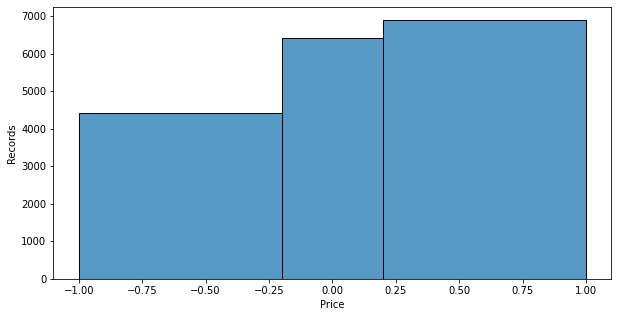

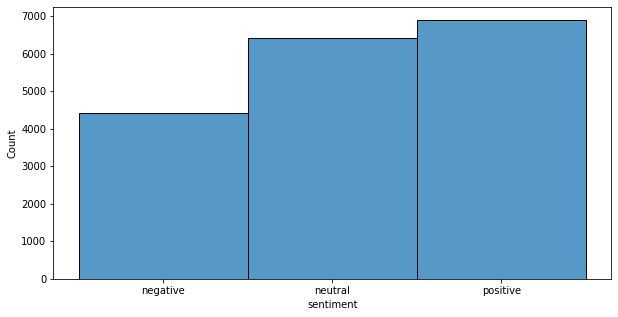

/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


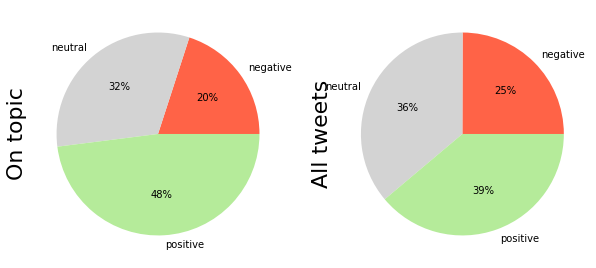

<Figure size 720x360 with 0 Axes>

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_df_subset=data_df.sample(n=100)

plt.figure(figsize=(10,5))
plt.xlabel('Price')
plt.ylabel('Records')
sns.histplot(data_df['compound_score'],bins=[-1,-0.20,0.20,1],kde=False)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data_df['sentiment'])
plt.show()

def label_function(val):
    return f'{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plt.figure(figsize=(10,5))
data_df_subset.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax1)
data_df.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax2)
ax1.set_ylabel('On topic', size=22)
ax2.set_ylabel('All tweets', size=22)
plt.tight_layout()

plt.show()

In [305]:
data_df[['id','compound_score','sentiment']].to_json(r'/Users/clairebeswick/code/EstefaniaVB/LexAI/data_json/twitter_query_sentiment_reduced.json')

## twitter press

In [307]:
lexai_url = f"http://35.223.18.2/indexes/twitter_press/search/"
params=dict(q='',limit=20000)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}

data = requests.get(lexai_url,params=params,headers=headers).json()
data_df=pd.DataFrame(data['hits'])
data_df.isnull().sum()

id                    0
timestamp             0
user                  0
text                  0
text_en            2871
date                  0
lang                  0
iso_lang           6147
user_verified         0
followers_count       0
user_loc              0
user_desc             0
user_desc_en       3001
user_image            0
hashtags              0
mentions              0
retweet_count         0
favorite_count        0
link                  0
dtype: int64

In [308]:
data_df=data_df.dropna(subset=['text_en'])
data_df.isnull().sum()

id                    0
timestamp             0
user                  0
text                  0
text_en               0
date                  0
lang                  0
iso_lang           3276
user_verified         0
followers_count       0
user_loc              0
user_desc             0
user_desc_en        151
user_image            0
hashtags              0
mentions              0
retweet_count         0
favorite_count        0
link                  0
dtype: int64

In [309]:
list=data_df['text_en'].tolist()
list_scores=[]
for i in list:
    list_scores.append(sid.polarity_scores(i)['compound'])

list_scores[0:10]

[0.0, 0.34, 0.0, 0.0, 0.4767, 0.0, -0.1027, -0.0516, -0.0516, -0.34]

In [310]:
data_df['compound_score']=list_scores
data_df.head()

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,user_loc,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score
454,1400737892616519683,1.622790e+09,noticiaaominuto,Sinta-se em casa numa destas igrejas convertid...,Feel at home in one of these churches converte...,2021/06/04 08:55:12,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,casaaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000
455,1400737870202167296,1.622790e+09,noticiaaominuto,Nepalesa? Uma variante que nós nem sequer val...,Nepali? A variant that we didn&#39;t even valu...,2021/06/04 08:55:07,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,paisaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.3400
456,1400737847812972551,1.622790e+09,noticiaaominuto,Atlético de Madrid pisca o olho a Bernardo Si...,Atlético de Madrid winks at Bernardo Silva #de...,2021/06/04 08:55:02,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,desportoaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000
478,1400735376948576256,1.622789e+09,noticiaaominuto,Novo iPad Pro da Apple poderá ter carregament...,New Apple iPad Pro may have wireless charging ...,2021/06/04 08:45:12,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,techaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000
480,1400735354450239489,1.622789e+09,noticiaaominuto,Amigos da Ria de Aveiro apontam dedo às pecua...,Friends of Ria de Aveiro point the finger at M...,2021/06/04 08:45:07,pt,None,False,19183,Portugal,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,paisaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.4767


In [312]:
# create a list of our conditions
conditions = [
    (data_df['compound_score'] <= -0.2),
    (data_df['compound_score'] > -0.2) & (data_df['compound_score'] <= 0.2),
    (data_df['compound_score'] > 0.2)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_df['sentiment'] = np.select(conditions, values)

data_df['sentiment'] = pd.Categorical(data_df['sentiment'], ['negative','neutral','positive'])

# display updated DataFrame
data_df.head()

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,...,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score,sentiment
454,1400737892616519683,1.622790e+09,noticiaaominuto,Sinta-se em casa numa destas igrejas convertid...,Feel at home in one of these churches converte...,2021/06/04 08:55:12,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,casaaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000,neutral
455,1400737870202167296,1.622790e+09,noticiaaominuto,Nepalesa? Uma variante que nós nem sequer val...,Nepali? A variant that we didn&#39;t even valu...,2021/06/04 08:55:07,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,paisaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.3400,positive
456,1400737847812972551,1.622790e+09,noticiaaominuto,Atlético de Madrid pisca o olho a Bernardo Si...,Atlético de Madrid winks at Bernardo Silva #de...,2021/06/04 08:55:02,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,desportoaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000,neutral
478,1400735376948576256,1.622789e+09,noticiaaominuto,Novo iPad Pro da Apple poderá ter carregament...,New Apple iPad Pro may have wireless charging ...,2021/06/04 08:45:12,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,techaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.0000,neutral
480,1400735354450239489,1.622789e+09,noticiaaominuto,Amigos da Ria de Aveiro apontam dedo às pecua...,Friends of Ria de Aveiro point the finger at M...,2021/06/04 08:45:07,pt,None,False,19183,...,Notícias ao Minuto - Seja o primeiro a saber.,Minute News - Be the first to know.,http://pbs.twimg.com/profile_images/3788000002...,paisaominuto,,0,0,https://twitter.com/noticiaaominuto/status/140...,0.4767,positive


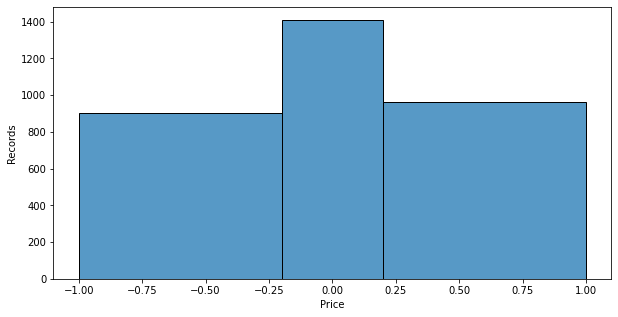

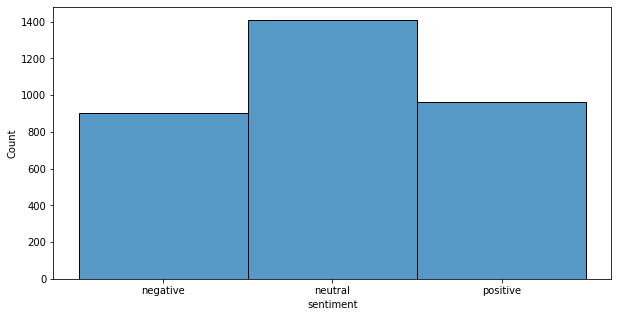

/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


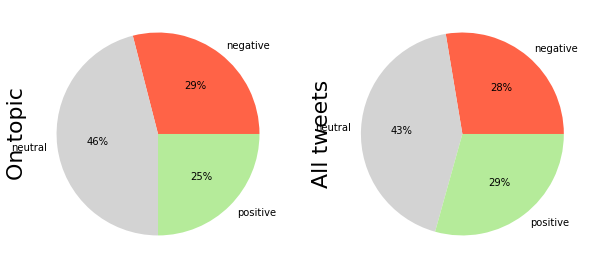

<Figure size 720x360 with 0 Axes>

In [313]:
data_df_subset=data_df.sample(n=100)

plt.figure(figsize=(10,5))
plt.xlabel('Price')
plt.ylabel('Records')
sns.histplot(data_df['compound_score'],bins=[-1,-0.20,0.20,1],kde=False)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data_df['sentiment'])
plt.show()

def label_function(val):
    return f'{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plt.figure(figsize=(10,5))
data_df_subset.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax1)
data_df.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax2)
ax1.set_ylabel('On topic', size=22)
ax2.set_ylabel('All tweets', size=22)
plt.tight_layout()

plt.show()

In [314]:
data_df[['id','compound_score','sentiment']].to_json(r'/Users/clairebeswick/code/EstefaniaVB/LexAI/data_json/twitter_press_sentiment_reduced.json')

## Twitter politicians

In [315]:
lexai_url = f"http://35.223.18.2/indexes/twitter_politicians/search/"
params=dict(q='',limit=20000)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}

data = requests.get(lexai_url,params=params,headers=headers).json()
data_df=pd.DataFrame(data['hits'])
data_df.isnull().sum()

id                     0
timestamp              0
user                   0
text                   0
text_en             1004
date                   0
lang                   0
iso_lang           20000
user_verified          0
followers_count        0
user_loc               0
user_desc              0
user_desc_en         986
user_image             0
hashtags               0
mentions               0
retweet_count          0
favorite_count         0
link                   0
dtype: int64

In [316]:
data_df=data_df.dropna(subset=['text_en'])
data_df.isnull().sum()

id                     0
timestamp              0
user                   0
text                   0
text_en                0
date                   0
lang                   0
iso_lang           18996
user_verified          0
followers_count        0
user_loc               0
user_desc              0
user_desc_en         103
user_image             0
hashtags               0
mentions               0
retweet_count          0
favorite_count         0
link                   0
dtype: int64

In [317]:
list=data_df['text_en'].tolist()
list_scores=[]
for i in list:
    list_scores.append(sid.polarity_scores(i)['compound'])

list_scores[0:10]

[-0.0516, -0.2732, 0.0, 0.0708, 0.0, -0.6486, 0.0, -0.5106, -0.9686, -0.7269]

In [318]:
data_df['compound_score']=list_scores
data_df.head()

,id,timestamp,user,text,text_en,date,lang,iso_lang,user_verified,followers_count,user_loc,user_desc,user_desc_en,user_image,hashtags,mentions,retweet_count,favorite_count,link,compound_score
0,1400763714316521474,1.622796e+09,FZarzalejos,La #UniónEuropea🇪🇺 ha estado donde necesitáb...,The #European Union🇪🇺 has been where we needed...,2021/06/04 10:37:49,es,None,False,1127,,Diputado (@EPPGroup) en @EuropeanParliament. M...,Deputy (@EPPGroup) in @EuropeanParliament. Mem...,http://pbs.twimg.com/profile_images/1151083649...,"UniónEuropea, Marruecos, Gobierno",,0,0,https://twitter.com/FZarzalejos/status/1400763...,-0.0516
1,1400761590203494402,1.622795e+09,woelken,Ich werde mehr Transparenz auf Werbemärkten f...,I will demand more transparency in advertising...,2021/06/04 10:29:22,de,None,True,58557,"Osnabrück, Niedersachsen","Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,,,1,13,https://twitter.com/woelken/status/14007615902...,-0.2732
2,1400761591340191746,1.622795e+09,woelken,Mehr Infos zum Wettbewerbsverfahren hier:,More information about the competition procedu...,2021/06/04 10:29:22,de,None,True,58557,"Osnabrück, Niedersachsen","Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,,,0,9,https://twitter.com/woelken/status/14007615913...,0.0000
3,1400761588538294273,1.622795e+09,woelken,Die Kommission hat ein #Wettbewerbsverfahren g...,The Commission has launched a #competition aga...,2021/06/04 10:29:22,de,None,True,58557,"Osnabrück, Niedersachsen","Sozialdemokrat, Nordlicht, Technikfan, Europä...","Social democrat, northern lights, technology f...",http://pbs.twimg.com/profile_images/1289500334...,"Wettbewerbsverfahren, Facebook, DigitalMarkets...",,2,17,https://twitter.com/woelken/status/14007615885...,0.0708
4,1400761514827583489,1.622795e+09,IdoiaVR,RT @PODEMOS: !!️ Ya están disponibles las ent...,RT @PODEMOS: !! ️ Tickets are now available to...,2021/06/04 10:29:04,es,None,True,10278,,Eurodiputada #Navarra por Unidas Podemos en @L...,MEP #Navarra for United We Can at @Left_EU Res...,http://pbs.twimg.com/profile_images/9467362766...,,PODEMOS,41,0,https://twitter.com/IdoiaVR/status/14007615148...,0.0000


In [338]:
# create a list of our conditions
conditions = [
    (data_df['compound_score'] <= -0.2),
    (data_df['compound_score'] > -0.2) & (data_df['compound_score'] <= 0.2),
    (data_df['compound_score'] > 0.2)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_df['sentiment'] = np.select(conditions, values)

data_df['sentiment'] = pd.Categorical(data_df['sentiment'], ['negative','neutral','positive'])

# display updated DataFrame
sentiment=data_df.to_dict()

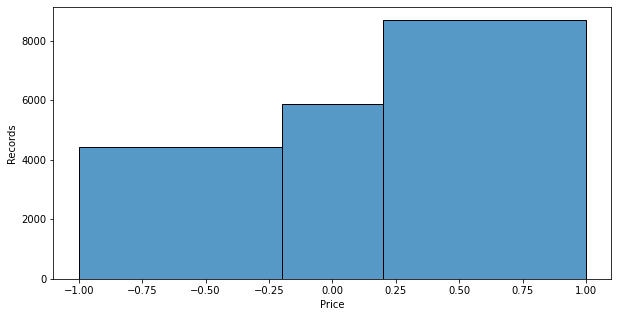

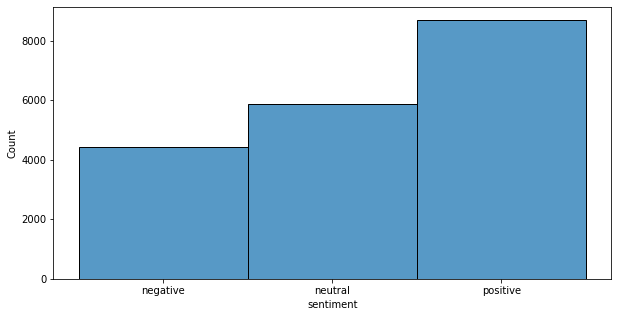

/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/clairebeswick/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


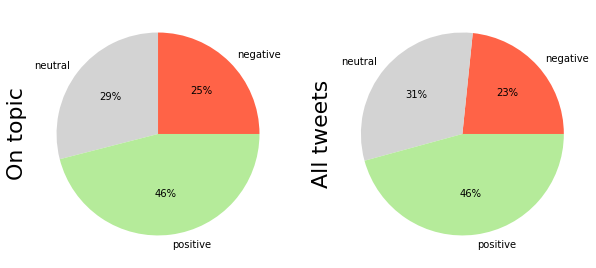

<Figure size 720x360 with 0 Axes>

In [320]:
data_df_subset=data_df.sample(n=100)

plt.figure(figsize=(10,5))
plt.xlabel('Price')
plt.ylabel('Records')
sns.histplot(data_df['compound_score'],bins=[-1,-0.20,0.20,1],kde=False)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data_df['sentiment'])
plt.show()

def label_function(val):
    return f'{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plt.figure(figsize=(10,5))
data_df_subset.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax1)
data_df.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax2)
ax1.set_ylabel('On topic', size=22)
ax2.set_ylabel('All tweets', size=22)
plt.tight_layout()

plt.show()

In [321]:
data_df[['id','compound_score','sentiment']].to_json(r'/Users/clairebeswick/code/EstefaniaVB/LexAI/data_json/twitter_politicians_sentiment_reduced.json')

In [323]:
data_query_df.to_json(r'/Users/clairebeswick/code/EstefaniaVB/LexAI/data_json/twitter_query_sentiment.json')

In [324]:
data_press_df.to_json(r'/Users/clairebeswick/code/EstefaniaVB/LexAI/data_json/twitter_press_sentiment.json')

In [325]:
data_polit_df.to_json(r'/Users/clairebeswick/code/EstefaniaVB/LexAI/data_json/twitter_politicians_sentiment.json')

## Function for updates

In [349]:
#requirements
#!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### DATA: transform to dataframe data_df
lexai_url = f"http://35.223.18.2/indexes/twitter_query/search/"
params=dict(q='',limit=20000)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}

data = requests.get(lexai_url,params=params,headers=headers).json()
data_df=pd.DataFrame(data['hits'])

# Data cleaning: analyzer does not work on empty values / option 2: apply it only to non empty values within the function
data_df=data_df.dropna(subset=['text_en'])

#initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

#make list of scores
# opt: if data_df['text_en']!=NaN:
list=data_df['text_en'].tolist()
list_scores=[]
for i in list:
    list_scores.append(sid.polarity_scores(i)['compound'])

#add list of scores to DF
data_df['compound_score']=list_scores

# Create categorical variable
    # create a list of our conditions
conditions = [
    (data_df['compound_score'] <= -0.2),
    (data_df['compound_score'] > -0.2) & (data_df['compound_score'] <= 0.2),
    (data_df['compound_score'] > 0.2)
    ]

    # create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

    # create a new column and use np.select to assign values to it using our lists as arguments
data_df['sentiment'] = np.select(conditions, values)
data_df['sentiment'] = pd.Categorical(data_df['sentiment'], ['negative','neutral','positive'])

# DF to dict
sentiments=data_df.to_dict()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/clairebeswick/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [348]:
# Fix format
fixed = {}
for i, key in enumerate(sentiments['id'].keys()):
    fixed[i] = {'id': sentiments['id'][key], 
                'compound_score': sentiments['compound_score'][key], 
                'sentiment': sentiments['sentiment'][key]}

FILENAME='try_data.json'
# Save to json
with open(FILENAME, 'w') as file:
    json.dump(fixed, file)

In [351]:
# Function takes json and gives back json

def sentiment(data,FILENAME):
    data_df=pd.DataFrame(data['hits'])
    
    # Data cleaning: analyzer does not work on empty values / option 2: apply it only to non empty values within the function
    data_df=data_df.dropna(subset=['text_en'])

    #initialize sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    #make list of scores
    # opt: if data_df['text_en']!=NaN:
    list=data_df['text_en'].tolist()
    list_scores=[]
    for i in list:
        list_scores.append(sid.polarity_scores(i)['compound'])

    #add list of scores to DF
    data_df['compound_score']=list_scores

    # Create categorical variable
        # create a list of our conditions
    conditions = [
        (data_df['compound_score'] <= -0.2),
        (data_df['compound_score'] > -0.2) & (data_df['compound_score'] <= 0.2),
        (data_df['compound_score'] > 0.2)
        ]

        # create a list of the values we want to assign for each condition
    values = ['negative', 'neutral', 'positive']

        # create a new column and use np.select to assign values to it using our lists as arguments
    data_df['sentiment'] = np.select(conditions, values)
    data_df['sentiment'] = pd.Categorical(data_df['sentiment'], ['negative','neutral','positive'])

    # DF to dict
    sentiments=data_df.to_dict()
    
    # Fix format
    fixed = {}
    for i, key in enumerate(sentiments['id'].keys()):
        fixed[i] = {'id': sentiments['id'][key], 
                    'compound_score': sentiments['compound_score'][key], 
                    'sentiment': sentiments['sentiment'][key]}

    # Save to json
    with open(FILENAME, 'w') as file:
        json.dump(fixed, file)
    
data = requests.get(lexai_url,params=params,headers=headers).json()
FILENAME='try_data.json'
sentiment(data,FILENAME)